<a href="https://colab.research.google.com/github/tommy-swimmer/mlearn/blob/master/RNN_for_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps

Step #1: Load in the data <br />
- Same as before, but not the right shape (N X T X D) <br />
Step: #2: Build the model <br />
- Shown in the code below. <br />
Step # 3: Train the model <br />
- All machine learning interfaces are the same <br />
Step #4: Evaluate the model <br />
Step #5: Make predictions <br />
- A little tricky, PAY ATTENTION TO SHAPES.

# Load in the data
- From a sine wave (with and without noise) we will create a supervised learning dataset. <br />
-Input: sequence of length T <br />
-Output: next value (scalar) <br />
Count from t = 0 . . . len(series) - T 
<br />

- Linear Regression expects 2-D input: N X T <br />
- RNN Expects 3-D input: N X T X 1


# Making predictions

- Input shape will be N X T D, output will be N X K <br />

- A single time-series input will be a 1-D array of length T.

# Simple RNN Sine Evaluation

In [ ]:
# Install TensorFlow if needed.
# Installing libraries.

from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

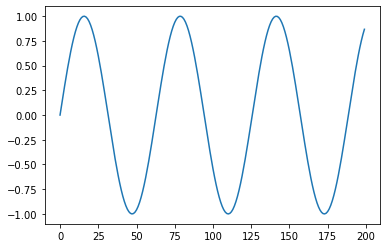

In [ ]:
# Make the original data
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1

# Plot it
plt.plot(series)
plt.show()

In [ ]:
# Build the dataset
# let's see if we can use T past values to predict the next value.
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [ ]:
# Try the autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

# Train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 50ms/step - loss: 0.2064 - val_loss: 0.1098
Epoch 2/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1548 - val_loss: 0.1488
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0907 - val_loss: 0.0086
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0141 - val_loss: 0.0530
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0384 - val_loss: 0.0181
Epoch 6/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0093 - val_loss: 0.0107
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0167 - val_loss: 0.0207
Epoch 8/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0160 - val_loss: 0.0038
Epoch 9/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0045 - val_loss: 0.0121
Epoch 10/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0082 - val_loss: 0.0096
Epoch 11/80
3/3 [============

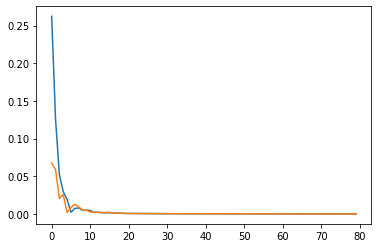

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')